Hola Juan!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class='alert alert-info'>
Estimado revisor, espero todo esté bien. El presente notebook es una entrega parcial, no el resultado final del proyecto, sin embargo apreciaría mucho la ayuda que me puedas prestar resolviendo las dudas que dejé a lo largo del archivo. Finalmente me gustaría adicionar que no me queda muy claro el tema de prueba de cordura y como puede ser validada en este caso. No siendo mas agradezco el tiempo dedicado a revisar mi proyecto 
</div>

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No te preocupes Juan, estoy aquí para apoyarte con el desarrollo de tu proyecto. Intentaré guiarte y resolver las dudas que hayas planteado a lo largo de tu proyecto.
</div>

<div class='alert alert-info'><b>Estimado revisor:</b> Gracias por las correcciones, observaciones y comentarios. El trabajo ahora incluye los ajustes solicitados. Muchas gracias por el tiempo dedicado</div>

Descripción del proyecto
La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.

Tienes acceso a los datos de comportamiento de los suscriptores que ya se han cambiado a los planes nuevos (del proyecto del sprint de Análisis estadístico de datos). Para esta tarea de clasificación debes crear un modelo que escoja el plan correcto. Como ya hiciste el paso de procesar los datos, puedes lanzarte directo a crear el modelo.

Desarrolla un modelo con la mayor exactitud posible. En este proyecto, el umbral de exactitud es 0.75. Usa el dataset para comprobar la exactitud.

Instrucciones del proyecto.
Abre y examina el archivo de datos. Dirección al archivo:datasets/users_behavior.csv Descarga el dataset
Segmenta los datos fuente en un conjunto de entrenamiento, uno de validación y uno de prueba.
Investiga la calidad de diferentes modelos cambiando los hiperparámetros. Describe brevemente los hallazgos del estudio.
Comprueba la calidad del modelo usando el conjunto de prueba.
Tarea adicional: haz una prueba de cordura al modelo. Estos datos son más complejos que los que habías usado antes así que no será una tarea fácil. Más adelante lo veremos con más detalle.
Descripción de datos
Cada observación en el dataset contiene información del comportamiento mensual sobre un usuario. La información dada es la siguiente:

сalls — número de llamadas,
minutes — duración total de la llamada en minutos,
messages — número de mensajes de texto,
mb_used — Tráfico de Internet utilizado en MB,
is_ultra — plan para el mes actual (Ultra - 1, Smart - 0).
Evaluación del proyecto
Hemos definido los criterios de evaluación para el proyecto. Lee esto con atención antes de pasar al ejercicio.

# Classifier Predictive model  for Megaline user's plan selection

This document presents the overall process for creating, training and selecting a predictive model. Our final result will be a classifier, which will predict the best phone plan based on user consumption. Let's get started by importing our dependencies

## Dependencies

We are using pandas, seaborn and sklearn. 

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

## Common functions

As we face a binary classification problem we will have to calculate the TPR (True Positive Rate) and the FPR (Fake Positive Rate). We will use those values to make a ROC ( Receiver Operative Characteristic) plot to decide which model performs the best for our porpouse.
Our functions will use the confusion matrix to calculate our rates

In [2]:
def calculate_TPR(confusion_matrix):
    return confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0])

def calculate_FPR(confusion_matrix):
    return (confusion_matrix[0][1])/(confusion_matrix[0][1]+confusion_matrix[1][1])
        

## Load and first glance: user_behavior.csv dataset

In [3]:
data = pd.read_csv('/datasets/users_behavior.csv')

In [4]:
data.duplicated().sum()

0

There is no duplicated data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [6]:
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto, los datos se cargaron correctamente, pero para que tengas más detalles de los mismos también te recomendaría el uso de `.describe()`
</div>

<div class='alert alert-info'>Corregido</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con este ajuste!
</div>

Columns data type are ok and for this analysis we __UNFORTUNATELY__ will __NOT__ be converting our columns range into an scaled version.

<AxesSubplot:xlabel='is_ultra', ylabel='Count'>

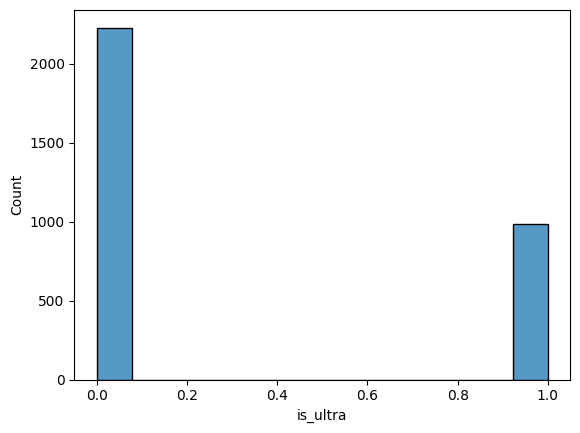

In [7]:
sns.histplot(data=data, x='is_ultra')

This dataset has a lot of non ultra users, that is somenthing we have to take into account when evaluating and training our model.

<div class="alert alert-info">Estimado revisor, En este acaso apreciaría tu sabio consejo. Cuales son los efectos de tener este desbalance de casos? como se podría contrarestar?</div>

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Es importante la pregunta que levantas en este punto, hay modelos de machine learning que son muy sensibles a este tipo de datos desbalanceados y es aquí donde entra la importancia de conocer las métricas de evaluación porque en este caso si entrenamos un modelo y tenemos un accuracy de 99% se puede deber a que la mayoría de los datos son para la clase 0 por lo que se debe evaluar con otra métrica cómo el f1-score.
    
En resumen, en cuanto a Machine Learning, el tener datos desbalanceados afecta el aprendizaje de los modelos.
</div>

<div class='alert alert-info'>Estimado revisor, cordial saludo nuevamente. Gracias por la claridad repecto al tema. Ahora puedo dimensionar que si las classes estan desbalanceadas el modelo puede tender a simplemente asignar la clase con mayor elementos por el hecho de tener mayor representación en el set de datos. Basicamente si el 90% de mis datos tiene una clase en particular, un 'buen' modelo sería decir que todos los elementos son de esa clase, solo tendría un 10% de falsos positivos y un 100% de sensibilidad.</div>

<div class="alert alert-block alert-info">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, tu entendiste muy bien mi comentario.
</div>

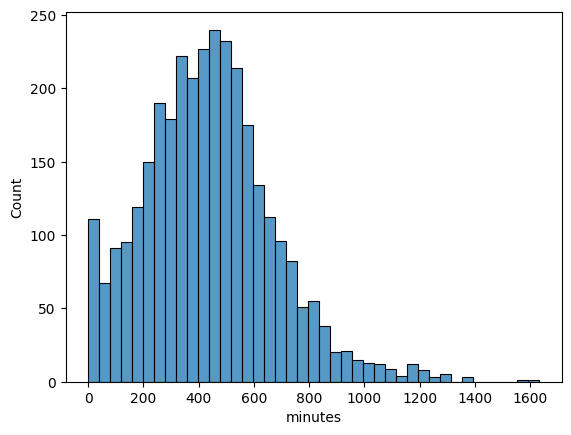

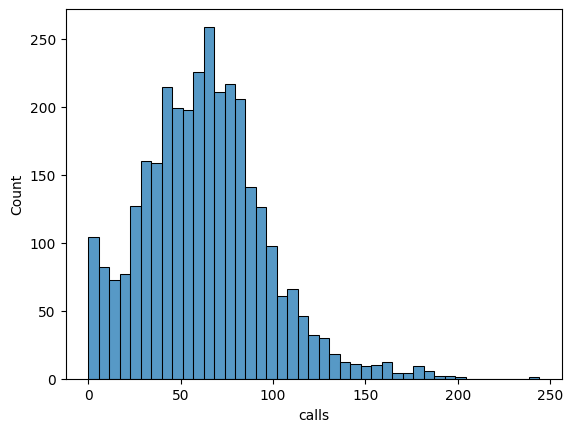

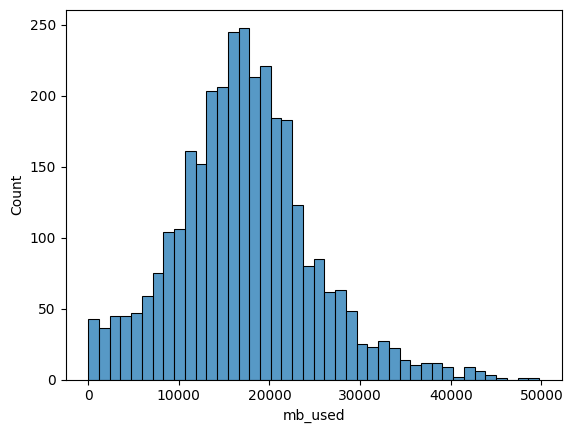

<AxesSubplot:xlabel='messages', ylabel='Count'>

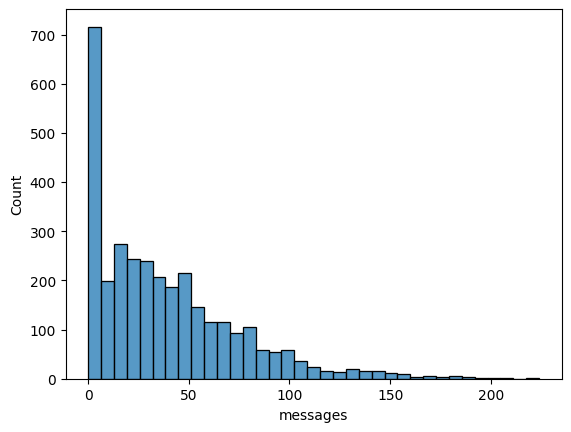

In [8]:

sns.histplot(data=data, x='minutes')
plt.show()
sns.histplot(data=data, x='calls')
plt.show()
sns.histplot(data=data, x='mb_used')
plt.show()
sns.histplot(data=data, x='messages')

From the histograms above, we can see the presence of too many outliers in more than one predictor column (all of them except is_ultra). However, __UNFORTUNATELY__ we will not address this problem. As a standard scaler will asume that our data follows a normal distribution in  this case a scaler based on percentils would be a great approach though. Now, let's continue splitting our dataset as is

<div class='alert alert-info'>Estimado revisor. Al revisar distintos recursos en internet, se especifica que los modelos de aprendizaje automático funcionan mejor cuando el rango de las variables predictoras es el mismo y exponen el uso de varios escaladores para tal fín. En este caso observé la presencia de algunos valores extremos, para los cuales se sugiere usar escaladores basados en percentiles. <b>Mis preguntas:<b> Es esto aconsejable? por qué no se explica esto en la plataforma si varios recursos lo toman como norma?</div>

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por tomar la iniciativa de investigar más a fondo sobre los problemas que puedes llegar a tener en base a lo que viste de tus datos. Efectivamente los modelos se pueden ver afectados cuando tienes variables muy distantes y un paso importante antes del entrenamiento es realizar un escalamiento para que todas tus variables sean "iguales" en cuanto al rango de valores que pueden llegar a tener. Esto es debido a que los modelos pueden verse sesgados a darle más importante a las columnas o variables que tienen valores más altos y al escalarlos se está mitigando este problema.
    
Cómo este es el sprint de introducción al Machine Learning no está aún ese paso en este proyecto, pero lo verás más adelante. Pero si quieres ir revisando por tu cuenta te comparto [**este artículo**](https://tutegomeze.medium.com/todo-sobre-el-feature-scaling-bba836d6c212) donde explican un poco más a fondo los diferentes tipos de escalamiento y adicional puedes irlo practicando y entrenando modelos para que compares cómo cambian las métricas de los mismos luego de aplicar estas técnicas
</div>

<div class="alert alert-info">El articulo está muy interesante, aunque no hemos abordado la matemática subyacente entiendo que aparte de mejorar el 'entendimiento' de los datos, el escalado también presenta una ventaja para que los gradientes (funciones de curva sobre superficies, para hallar maximos y minimos si mal no recuerdo de mis clases de ingeniería) convergan a la solución optima.
Ahora me pregunto si se podrían usar diferentes escaladores para ajustar los rangos de mis variables predictoras con la intención de ajustar los pesos de dichas caracteristicas en mi modelo. 
Supongamos que tengo un grupo de personas que han sido expuestas a sustancias cancerigenas que se dividen en grupos (como la FDA categoriza las sustancias nocivas si no estoy mal) 
    <br><br>
    <table style='border:1px solid'>
        <thead>
            <tr>
                <td>Grupo 1</td>
                <td>Grupo 2</td>
                <td>Grupo 3</td>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>elementos altamente cancerigenos como el tabaco, ciertos alimentos ultra procesados y sustancias industriales</td>
                <td>sustancias que usualmente requieren exposicion prolongada para producir cancer</td>
                <td>sustancias que posiblemente podrían ocasionar cancer despues de una alta y prolongada exposicion</td>
            </tr>
        </tbody>
    </table>
    <br><br>
     En mi caso supondría que los cancerigenos del grupo 1 podrían tener una mayor importancia para predecir si una persona puede o no tener cancer, por lo tanto usaría una tecnica de escalado que me permita representar esa hipótesis en mi modelo (un escalado con un rango mayor), el grupo 2 tendría un escalado menor y a su vez el tercer grupo tambien.
    <b>Es esta idea correcta? o los metodos matemáticos subyacentes no me lo permiten</b>
</div>

<div class="alert alert-block alert-info">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Estás en lo correcto de cierta manera, aunque en lugar de aplicar diferentes escaladores debes aplicar lo que se conoce cómo `feature engineering` que es básicamente analizar las variables que se tiene e incluso crear nuevas con el fin de mejorar el desempeño del modelo. Dentro de esto tienes también `feature importance` que en resumen es tomar solo variables que ayudan con el performance del modelo, estas técnicas son temas un poco avanzados por lo que en este proyecto no lo has visto, pero te dejo estos artículos si gustas ir revisando un poco sobre esos temas aunque pueden ser un poco confuso al inicio conforme tengas más conocimientos te será más fácil entenderlo: [Feature Engineering](https://medium.com/pythons-gurus/mastering-feature-engineering-c8ec714d9656), [Feature Importance](https://blog.gopenai.com/feature-importance-analysis-with-python-tutorial-1c7782babcc4)
</div>

In [9]:
features = data.drop(['is_ultra'], axis=1)
target = data[['is_ultra']]

In [10]:
training_features, validation_features, training_target, validation_target = train_test_split(features, target, test_size=0.25, random_state=12345)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, realizaste la división de los datos de manera correcta, recuerda siempre este paso ya que para validar que un modelo está entrenando de manera correcta hay que tener un conjunto de prueba 
</div>

## Model candidates

### Decision Tree Classifier:

Let's start by evaluating the feasibility of decision tree classifier. For that matter we will use a DataFrame to storage the evaluation metrics for our mmodel. Our hyperparameter `max_depth` will vary from 1 to 20 then we will check the TPR vs the FTR

In [11]:
tree_model_results = pd.DataFrame(columns=['max_depth', 'accuracy', 'training_accuracy', 'validation_accuracy', 'recall', 'precision', 'score'])
n= 1

for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(training_features, training_target)
    
    
    tree_model_results.loc[n, 'max_depth'] = depth
    tree_model_results.loc[n, 'training_accuracy'] = model.score(training_features, training_target)
    tree_model_results.loc[n, 'validation_accuracy'] = model.score(validation_features, validation_target)

    predictions = model.predict(validation_features)
    tree_model_results.loc[n, 'TPR'] = calculate_TPR(confusion_matrix(predictions, validation_target))
    tree_model_results.loc[n, 'FPR'] = calculate_FPR(confusion_matrix(predictions, validation_target))
    n += 1
    
    

    

<AxesSubplot:xlabel='FPR', ylabel='TPR'>

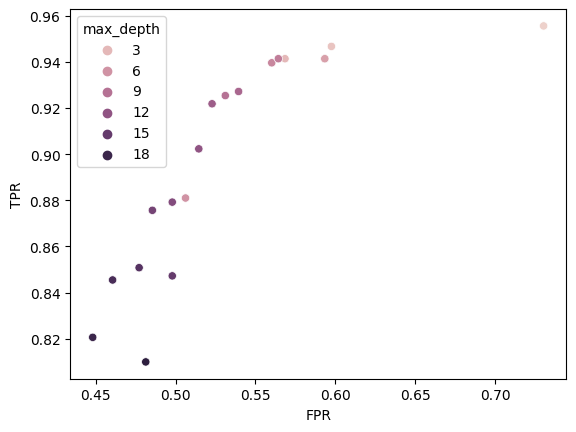

In [12]:
sns.scatterplot(data=tree_model_results, x='FPR', y='TPR', hue='max_depth')

Now let's talk about our OCR plot. There are two axis here, the y-axis represent how precise an ultra user will be correct predicted as ultra user, this is the same than the __precision__ metric. In the other hand we have the amount of those no ultra user identified as ultra.
Now is on us to decide which hyperparameter work the best for us, some hyperparam values are obviouslly a bad decision. Let's try to find an hyperparameter that maximize our TPR without affecting our FTR.

<div class='alert alert-info'>Estimado revisor. En este caso estaría tentado a elegir un modelo que tenga un buen valor de TPR (no se como se llama el concepto en Español) pero que el FTR no sea muy alto. Pero, ¿que tan importante sería detectar todos los usuarios que necesitan el plan ultra al costo de incluir algunos usuarios que no lo necesitan?

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Realizaste un entrenamiento correcto! Ahora sobre tu pregunta, te podría decir que esto dependerá en gran medida del contexto del negocio, ya que se debe considerar factores como los costos asociados con ofrecer el plan a usuarios que no lo necesitan, los beneficios de identificar correctamente a los que sí lo necesitan, el impacto en la satisfacción del cliente y la estrategia general de la empresa, entre otros. Recuerda que como Data Scientist siempre estarás muy de cerca con gente de negocio y hay que conocerlo muy bien para poder tomar estas decisiones, para fines de tu proyecto debes buscar el mejor modelo sin considerar métricas de negocio es decir, el que mejor TPR tenga pero con bajo FPR ya que esto indica que el modelo realiza predicciones más certeras
</div>

<AxesSubplot:xlabel='training_accuracy', ylabel='validation_accuracy'>

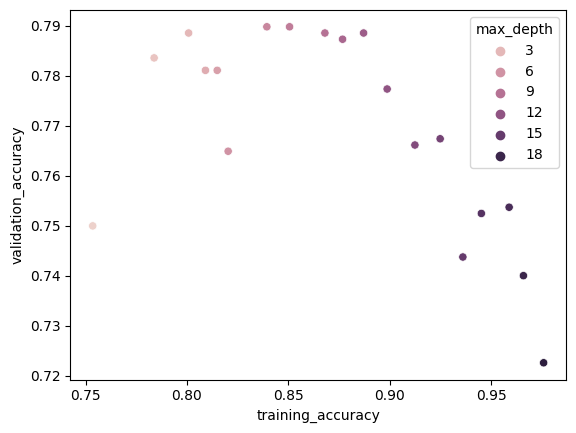

In [13]:
sns.scatterplot(data=tree_model_results, x='training_accuracy', y='validation_accuracy', hue='max_depth')

As we know it is important to evaluate the overfitting and underfitting conditions and in this case we can see that Decision tree classifiers are very likely to overfitting. Probably not the best option for this case  

### Random forest

For evaluating feasibility of random forest classifiers we will use a DataFrame to storage the evaluation metrics for our mmodel. Our hyperparameter `max_depth` will vary from 1 to 20 then for each value the number of estimators (n_estimators) will also vary from 1 to 20.

In [14]:
random_forest_results = pd.DataFrame(columns=['max_depth', 'n_estimators', 'accuracy', 'training_accuracy', 'validation_accuracy', 'TPR', 'FPR', 'score'])

for depth in range(1, 20):
    for estimators in range(1, 20):
        model = RandomForestClassifier(max_depth=depth, n_estimators = estimators)
        model.fit(training_features, training_target)
        random_forest_results.loc[n, 'max_depth'] = depth
        random_forest_results.loc[n, 'n_estimators'] = estimators

        random_forest_results.loc[n, 'training_accuracy'] = model.score(training_features, training_target)
        random_forest_results.loc[n, 'validation_accuracy'] = model.score(validation_features, validation_target)

        predictions = model.predict(validation_features)
        random_forest_results.loc[n, 'TPR'] = calculate_TPR(confusion_matrix(predictions, validation_target))
        random_forest_results.loc[n, 'FPR'] = calculate_FPR(confusion_matrix(predictions, validation_target))
        n += 1
    

/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarn

/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarn

/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarn

/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarn

/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarn

/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarn

/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarn

/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarn

/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarn

/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(training_features, training_target)
/tmp/ipykernel_83/349061368.py:6: DataConversionWarn

<AxesSubplot:xlabel='FPR', ylabel='TPR'>

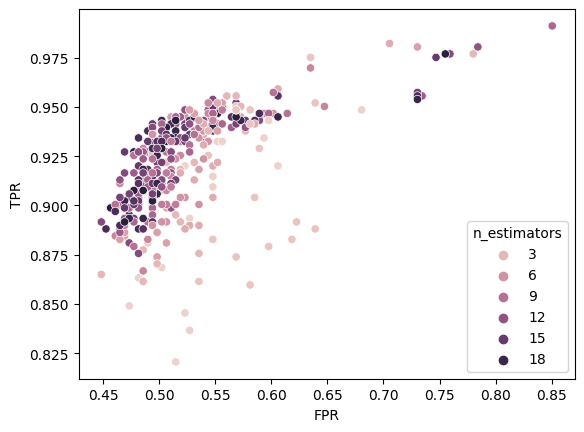

In [15]:
sns.scatterplot(data=random_forest_results, x='FPR', y='TPR', hue='n_estimators')

Now let's talk about our OCR plot. There are two axis here, the y-axis represent how precise an ultra user will be correct predicted as ultra user, this is the same than the __precision__ metric. In the other hand we have the amount of those no ultra user identified as ultra.
Now is on us to decide which hyperparameter work the best for us, some hyperparam values are obviouslly a bad decision. Let's try to find an hyperparameter that maximize our TPR without affecting our FPR.

<AxesSubplot:xlabel='training_accuracy', ylabel='validation_accuracy'>

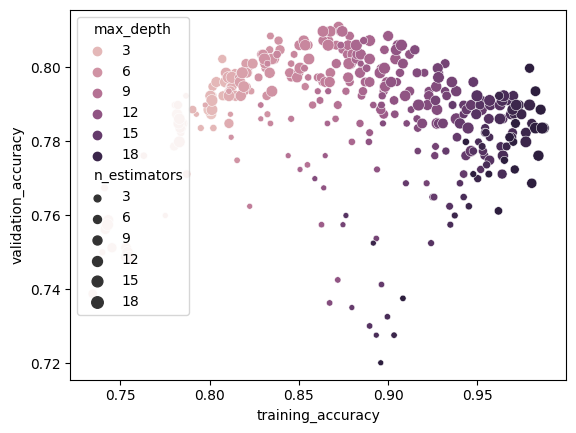

In [16]:
sns.scatterplot(data=random_forest_results, x='training_accuracy', y='validation_accuracy', hue='max_depth', size='n_estimators')

As we know it is important to evaluate the overfitting and underfitting conditions and in this case we can see that Decision tree classifiers are very likely to overfitting. In this case a forest with depth tree between 3 and 6 must be enough, and the number of the estimators higher than 6 should work

In [17]:
random_forest_results['validation_accuracy'] = pd.to_numeric(random_forest_results['validation_accuracy'])
random_forest_results['training_accuracy'] = pd.to_numeric(random_forest_results['training_accuracy'])

In [18]:
random_forest_results['overfitting'] = random_forest_results['validation_accuracy'] - random_forest_results['training_accuracy']  

In [19]:
index_max = random_forest_results['overfitting'].idxmax()
random_forest_results.query('index==@index_max')



,max_depth,n_estimators,accuracy,training_accuracy,validation_accuracy,TPR,FPR,score,overfitting
24,1,5,NaN,0.741079,0.767413,0.980462,0.73029,NaN,0.026334


<AxesSubplot:xlabel='n_estimators', ylabel='validation_accuracy'>

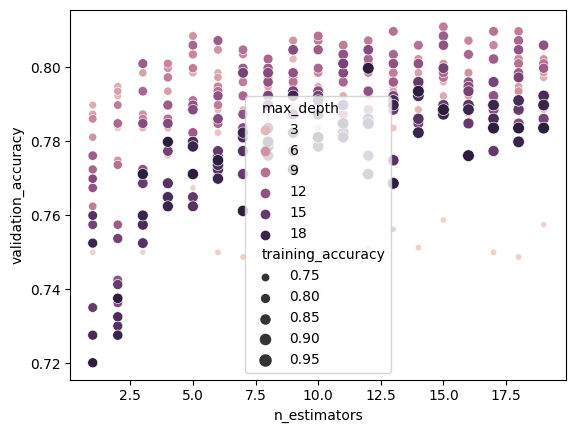

In [20]:
sns.scatterplot(data=random_forest_results, x='n_estimators', y='validation_accuracy', hue='max_depth', size='training_accuracy')

Based in the plot above a decent number of estimators will be 7 with a max_depth between 6 and 9. A model like that will give us a good validation accuracy. Now let's filter them.

In [21]:
random_forest_results.query('n_estimators==7')

,max_depth,n_estimators,accuracy,training_accuracy,validation_accuracy,TPR,FPR,score,overfitting
26,1,7,NaN,0.753112,0.748756,0.955595,0.73444,NaN,-0.004356
45,2,7,NaN,0.787137,0.771144,0.950266,0.647303,NaN,-0.015993
64,3,7,NaN,0.790456,0.788557,0.969805,0.634855,NaN,-0.001899
83,4,7,NaN,0.814108,0.798507,0.950266,0.556017,NaN,-0.015600
102,5,7,NaN,0.821577,0.798507,0.946714,0.547718,NaN,-0.023069
121,6,7,NaN,0.831120,0.799751,0.946714,0.543568,NaN,-0.031369
140,7,7,NaN,0.837759,0.803483,0.952043,0.543568,NaN,-0.034277
159,8,7,NaN,0.863071,0.796020,0.943162,0.547718,NaN,-0.067051
178,9,7,NaN,0.874274,0.804726,0.928952,0.485477,NaN,-0.069547
197,10,7,NaN,0.885062,0.792289,0.9254,0.518672,NaN,-0.092774


#### Best random forest

Based in the previous table, we conclude that the set of hyperparamateres could work the best is:
 - n_estimators = 7 
 - max_depth = 9

### Logistic regression

Now it is time for logistic regression model, for this particular case we are going to use the confusion matrix and evaluate the TPR and FTR

In [22]:
model = LogisticRegression()
model.fit(training_features, training_target)
predictions = model.predict(validation_features)
print(confusion_matrix(validation_target, predictions))


[[559   4]
 [234   7]]


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [23]:
model.score(validation_features, validation_target)

0.7039800995024875

In [24]:
logistic_tpr = calculate_TPR(confusion_matrix(validation_target, predictions))
logistic_tpr

0.7049180327868853

In [25]:
logistic_fpr = calculate_FPR(confusion_matrix(validation_target, predictions))
logistic_fpr

0.36363636363636365

<div class="alert alert-block alert-info">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un muy buen trabajo Juan! Entrenaste los modelos de la manera correcta y analizaste tus datos previo al entrenamiento lo cual es una excelente práctica ya que un buen modelo dependerá de que tan buenos datos le estés enviando para entrenarlo.
<br>
<br>
Por otro lado, al inicio mencionaste que no entendías la parte de prueba de cordura y este proceso lo realizaste revisando que tan balanceado está tu dataset, este balance entre clases te da un indicio de que tan bueno debe ser su métrica de `accuracy` por ejemplo, ya que si el dataset tiene 90% de datos para una clase ese score debe estar por ese mismo porcentaje, pero para complementar ese análisis se deben usar otras métricas cómo lo que ya has aplicado tales como la matriz de confusión, los rates de falsos y verdaderos positivos, etc.
<br>
<br>
Te invito a que escribas tus conclusiones finales y escojas el mejor modelo basándote en el umbral de 0.75 de accuracy que se plantea para este proyecto. Se que puede que te surjan dudas en cuanto a las prácticas a seguir para el entrenamiento de modelos, pero a lo largo de los siguientes sprints aprenderás técnicas que ayudan a medir correctamente los modelos de aprendizaje automático. 
<br>
<br>
Tu proyecto está casi completo, solo haría falta la redacción de tus conclusiones y escoger el mejor modelo. Si tienes otra duda dejala cómo comentario y trataré de responderte en tu siguiente iteración. Saludos!
</div>

### Our best model:

Our best model would be the best random forest we described a couple cells before in the Random Forest Section

## Conclusion

Based in the process, let's make some conclutions.
- The pipeline of implementing a machine learning model depends in the quality of our training data
- To avoid bias in the learning process it is usefull to split the dataset into training and validation (ensuring our model can be tested with data that has never before been seen)
- The evaluation metrics (TPR and FPR, accuracy...) are a powerfull to compare models. Selecting the correct model is one of the most important decisions we can make in data science.
- When comparing accuracy between validation and training set we will discover and overfited model.